### Importing Dependencies and reading data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

In [3]:
pwd

'c:\\Users\\sjasm\\Documents\\EV_data_analysis\\notebooks and experiments'

In [4]:
os.chdir('../')

In [5]:
pwd

'c:\\Users\\sjasm\\Documents\\EV_data_analysis'

In [6]:
df = pd.read_csv('datasets/ev_data1.csv')

In [7]:
df.head()

,Title,Battery Size (kWh),Top Speed (km/h),Range (km),Efficiency (Wh/km),Fastcharge Speed (km/h),price_pounds
0,Tesla Model 3,57.5,225,405,142,680,42990.0
1,Tesla Model Y Long Range Dual Motor,75.0,217,435,172,670,52990.0
2,Tesla Model 3 Long Range Dual Motor,75.0,233,485,155,750,50990.0
3,BYD ATTO 3,60.5,160,330,183,370,37195.0
4,Tesla Model 3,57.5,201,420,137,700,44000.0


### Descriptive statistics

In [8]:
df.shape

(367, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    367 non-null    object 
 1   Battery Size (kWh)       367 non-null    float64
 2   Top Speed (km/h)         367 non-null    int64  
 3   Range (km)               367 non-null    int64  
 4   Efficiency (Wh/km)       367 non-null    int64  
 5   Fastcharge Speed (km/h)  367 non-null    int64  
 6   price_pounds             233 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 20.2+ KB


In [10]:
df.describe()

,Battery Size (kWh),Top Speed (km/h),Range (km),Efficiency (Wh/km),Fastcharge Speed (km/h),price_pounds
count,367.000000,367.000000,367.000000,367.000000,367.000000,233.000000
mean,71.436785,181.297003,371.021798,195.171662,548.937330,61719.433476
std,19.996469,36.345813,105.113026,31.928035,233.301826,36024.746358
min,21.300000,125.000000,135.000000,137.000000,170.000000,26000.000000
25%,57.750000,160.000000,300.000000,171.000000,360.000000,38000.000000
50%,71.000000,180.000000,380.000000,188.000000,530.000000,50830.000000
75%,85.700000,200.000000,442.500000,208.000000,665.000000,73245.000000
max,123.000000,320.000000,685.000000,295.000000,1290.000000,350000.000000


In [11]:
df['price_pounds'].median()

50830.0

In [12]:
df.isnull().sum()

Title                        0
Battery Size (kWh)           0
Top Speed (km/h)             0
Range (km)                   0
Efficiency (Wh/km)           0
Fastcharge Speed (km/h)      0
price_pounds               134
dtype: int64

In [13]:
136/df.shape[0]*100

37.05722070844686

c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='price_pounds'>

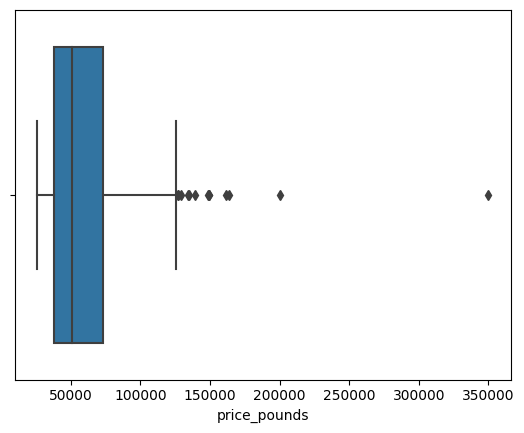

In [14]:
##checking outliers in price column
sns.boxplot(x = 'price_pounds', data = df, orient= "v")

##outliers are present so we will apply median imputation

#### Method 1. removing null values

In [15]:
df_removed = df.dropna(subset=['price_pounds'])

In [16]:
df_removed.isnull().sum()

Title                      0
Battery Size (kWh)         0
Top Speed (km/h)           0
Range (km)                 0
Efficiency (Wh/km)         0
Fastcharge Speed (km/h)    0
price_pounds               0
dtype: int64

In [17]:
df_removed.shape

(233, 7)

#### Method 1. performing median imputation

In [18]:
df['price_pounds'] = df['price_pounds'].fillna(df['price_pounds'].median())

In [19]:
df.isnull().sum()

Title                      0
Battery Size (kWh)         0
Top Speed (km/h)           0
Range (km)                 0
Efficiency (Wh/km)         0
Fastcharge Speed (km/h)    0
price_pounds               0
dtype: int64

c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='price_pounds'>

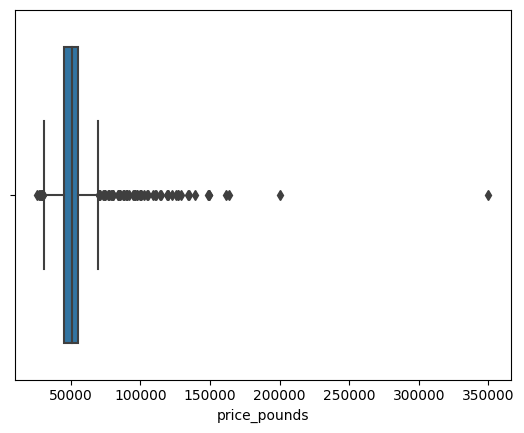

In [20]:
sns.boxplot(x = 'price_pounds', data = df, orient= "v")

In [21]:
df.duplicated().sum()

3

In [22]:
df = df.drop_duplicates()

In [23]:
df.duplicated().sum()

0

In [24]:
df.describe()

,Battery Size (kWh),Top Speed (km/h),Range (km),Efficiency (Wh/km),Fastcharge Speed (km/h),price_pounds
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,71.369780,181.041209,370.508242,195.280220,547.994505,57816.478022
std,20.015007,36.384327,105.254264,32.014865,233.967081,29266.201301
min,21.300000,125.000000,135.000000,137.000000,170.000000,26000.000000
25%,57.875000,160.000000,300.000000,171.000000,360.000000,45183.750000
50%,70.750000,180.000000,380.000000,188.000000,520.000000,50830.000000
75%,85.100000,200.000000,440.000000,208.250000,660.000000,55000.000000
max,123.000000,320.000000,685.000000,295.000000,1290.000000,350000.000000


### Visualizations

#### Univariate Analysis using distplot

C:\Users\sjasm\AppData\Local\Temp\ipykernel_9220\4105172114.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax = ax)
C:\Users\sjasm\AppData\Local\Temp\ipykernel_9220\4105172114.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax = ax)
C:\Users\sjasm\AppData\Local\T

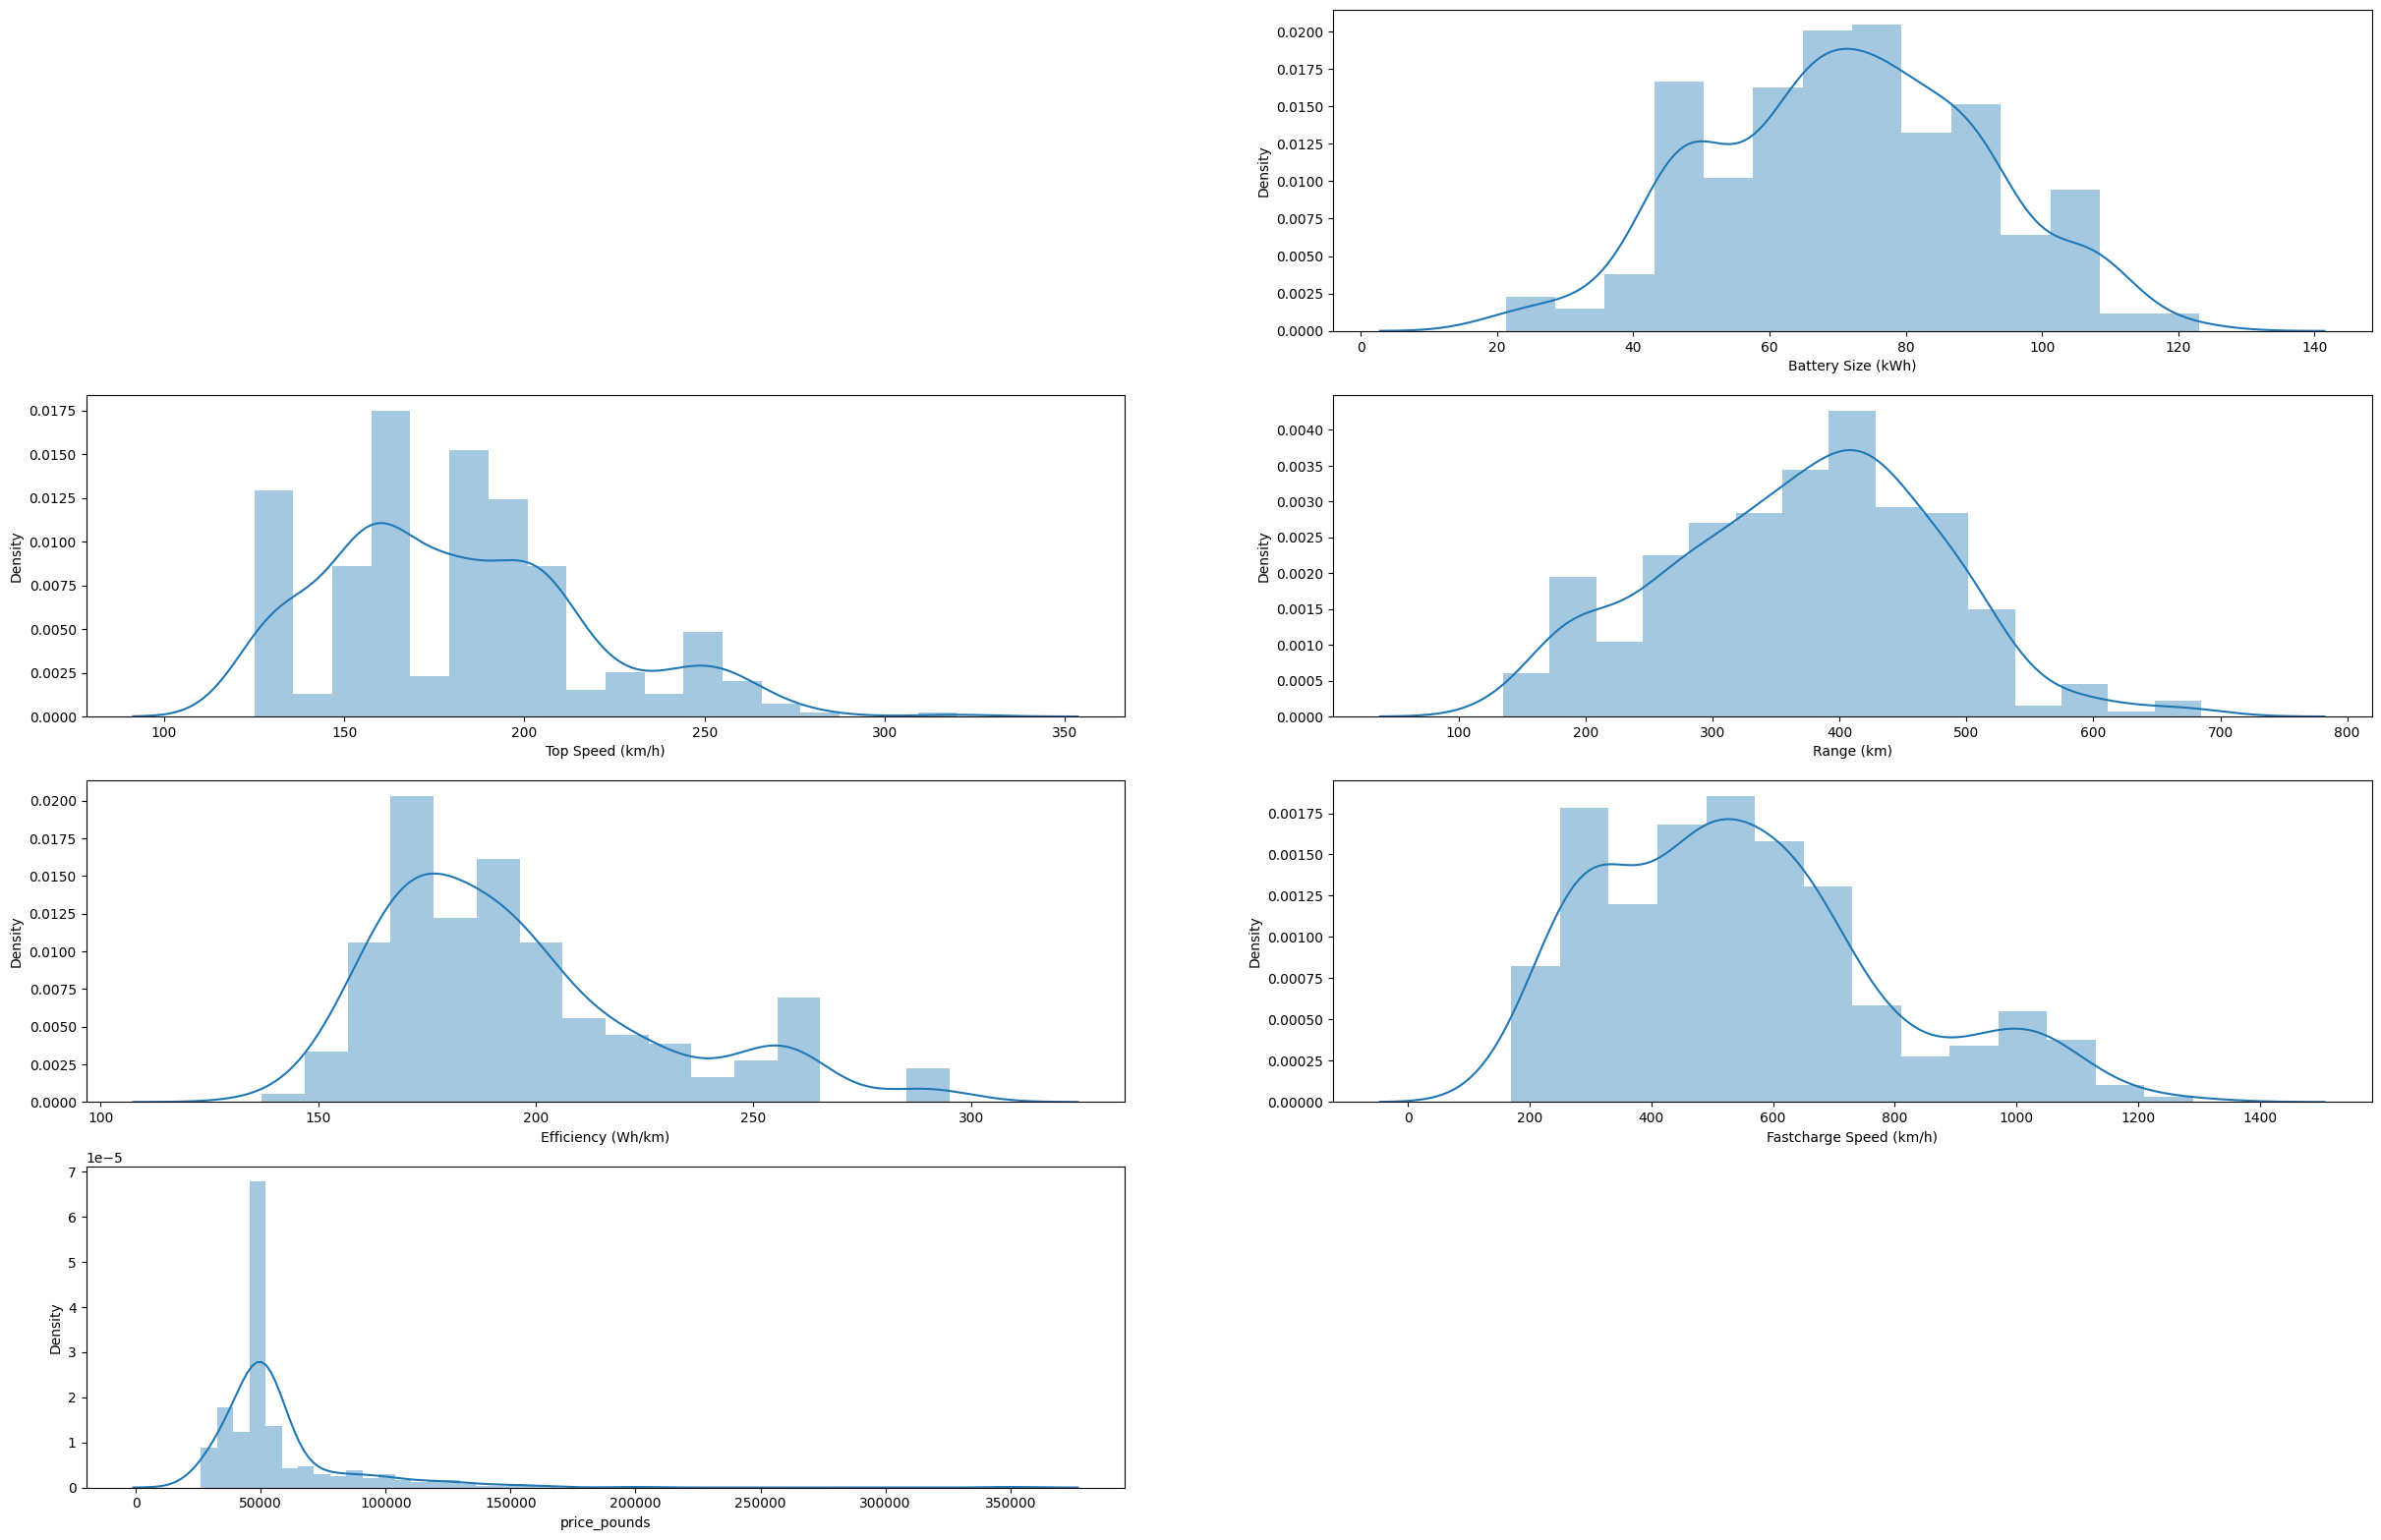

In [26]:
#checking feature distributions using 
plt.figure(figsize=(30,45))

for i, column in enumerate(df.columns):
    if df[column].dtype!= 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.distplot(df[column], ax = ax)
        plt.xlabel(column)
plt.show()

C:\Users\sjasm\AppData\Local\Temp\ipykernel_9220\3300257031.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax = ax)
C:\Users\sjasm\AppData\Local\Temp\ipykernel_9220\3300257031.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax = ax)
C:\Users\sjasm\AppData\Local\T

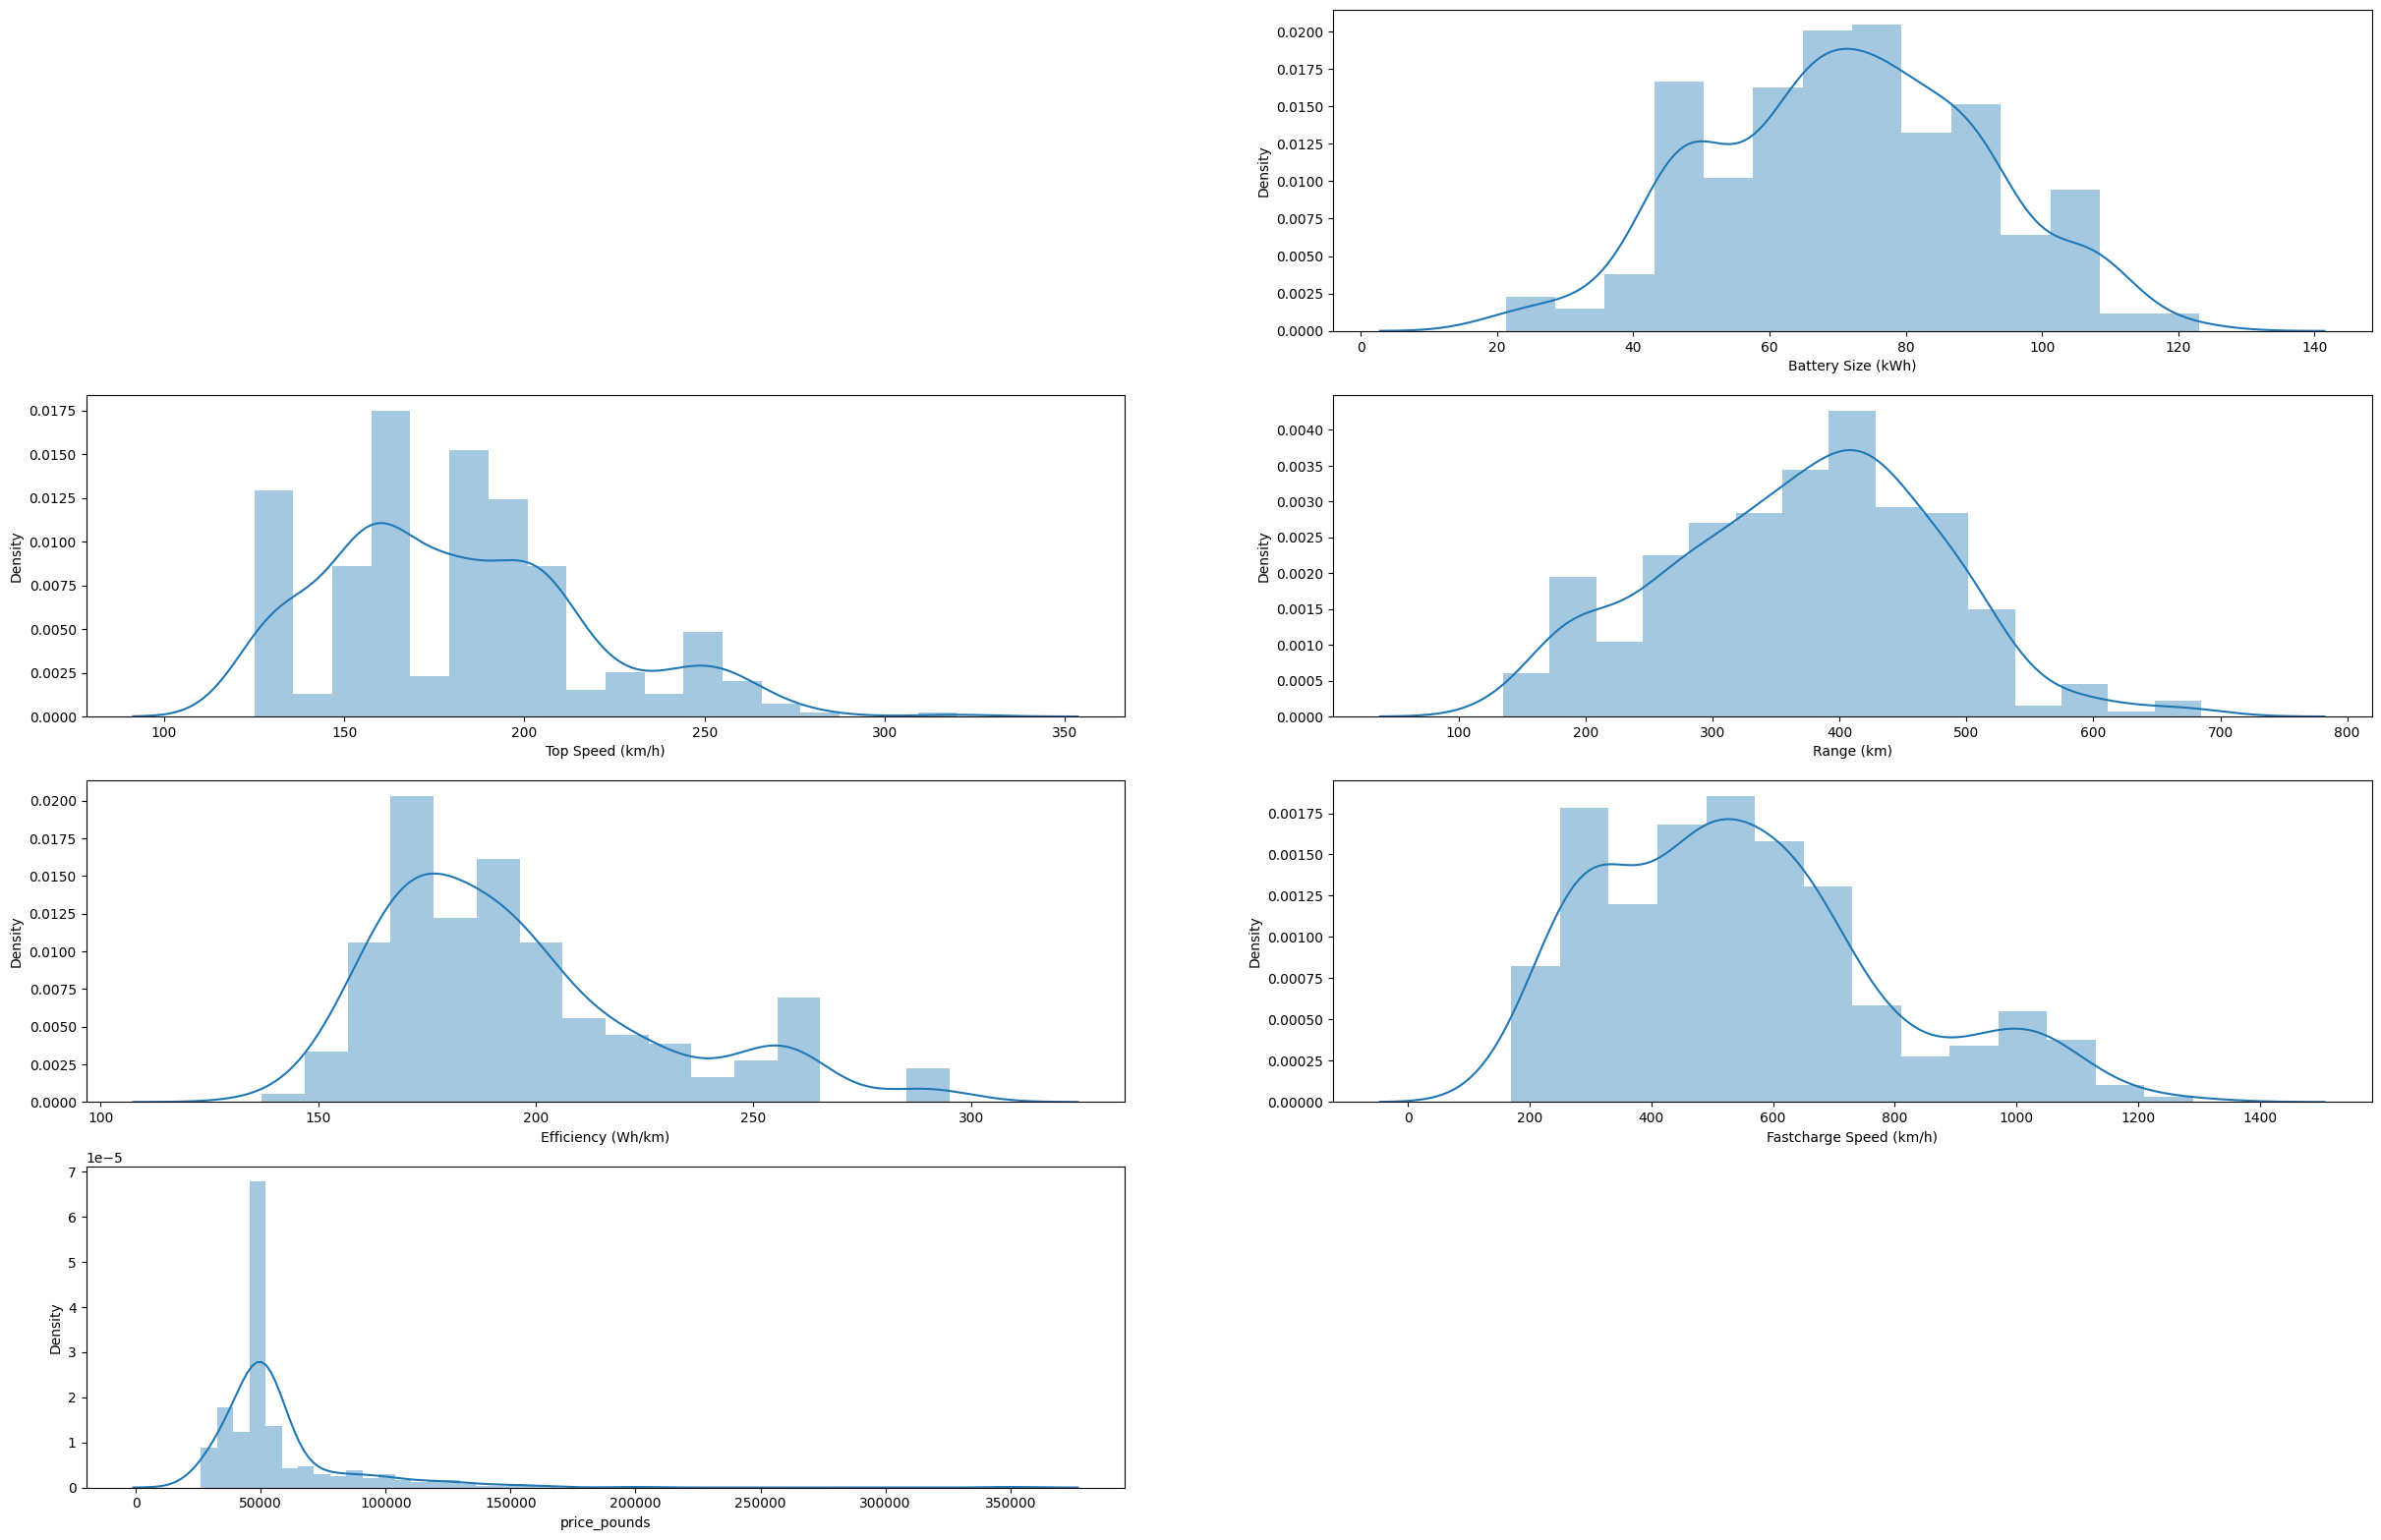

In [27]:
plt.figure(figsize=(30,45))

for i, column in enumerate(df.columns):
    if df_removed[column].dtype!= 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.distplot(df[column], ax = ax)
        plt.xlabel(column)
plt.show()

inference: None of them follow perfect normal distribution

### Bivariate Analysis

Text(0.5, 1.0, ' Relationship between Price and Effieciency')

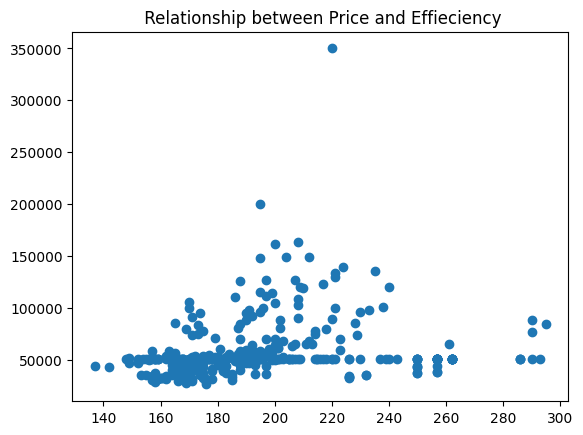

In [28]:
x = df['Efficiency (Wh/km)']
y = df['price_pounds']
plt.scatter(x,y)
plt.title(' Relationship between Price and Effieciency')

(0.0, 366200.0)

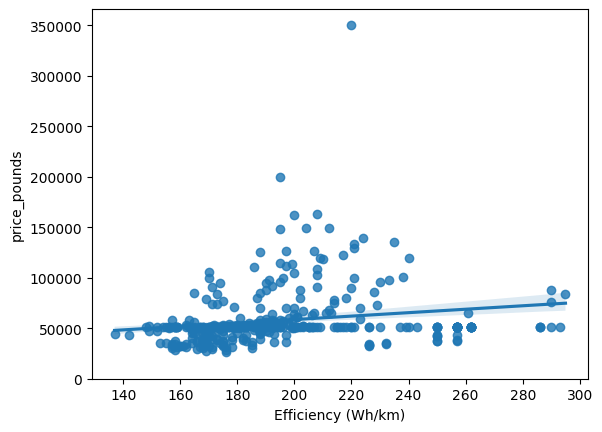

In [29]:
##correlation
sns.regplot(x = 'Efficiency (Wh/km)', y = 'price_pounds', data = df)
plt.ylim(0,)

Inference: Weak correlation between the variables

(0.0, 366200.0)

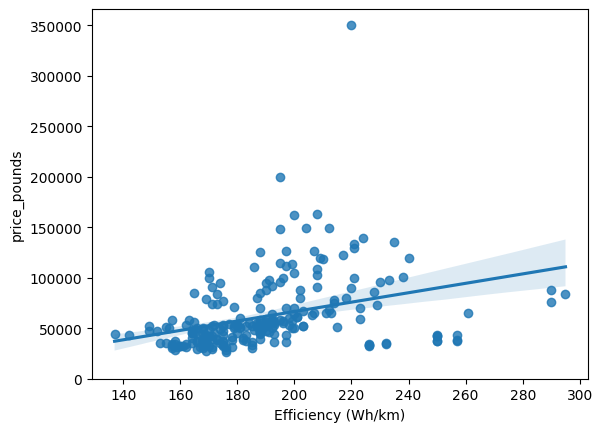

In [30]:
sns.regplot(x = 'Efficiency (Wh/km)', y = 'price_pounds', data = df_removed)
plt.ylim(0,)

Inference: Slight +ve correlcation betweenthe variables

Calculating strength of correlation

In [31]:
pearson_coeff1, p_val1 = stats.pearsonr(df['Efficiency (Wh/km)'], df['price_pounds'])
print(pearson_coeff1, p_val1)

0.1867141793207361 0.000341531526477888


In [32]:
pearson_coeff2, p_val2 = stats.pearsonr(df_removed['Efficiency (Wh/km)'], df_removed['price_pounds'])
print(pearson_coeff2, p_val2)

0.3474095745819416 5.180473166463937e-08


Inference:
1. pearson_coeff1 < pearson_coeff2 and both of them are +ve so in df_removed Efficeincy is slightly more +vely correlated with price than df. 
2. For pval2 < 0.001 (strong certainity associated)

In [33]:
##cheking other valiable relationships

df.iloc[:,1:].corr()['price_pounds'].sort_values()

Efficiency (Wh/km)         0.186714
Range (km)                 0.363920
Fastcharge Speed (km/h)    0.429833
Battery Size (kWh)         0.500289
Top Speed (km/h)           0.608793
price_pounds               1.000000
Name: price_pounds, dtype: float64

Inference: Top Speed and battery size are highly correlated with price.

In [34]:
df_removed.iloc[:,1:].corr()['price_pounds'].sort_values()

Efficiency (Wh/km)         0.347410
Fastcharge Speed (km/h)    0.482235
Range (km)                 0.495022
Battery Size (kWh)         0.653767
Top Speed (km/h)           0.724216
price_pounds               1.000000
Name: price_pounds, dtype: float64

### Correlation Heatmap

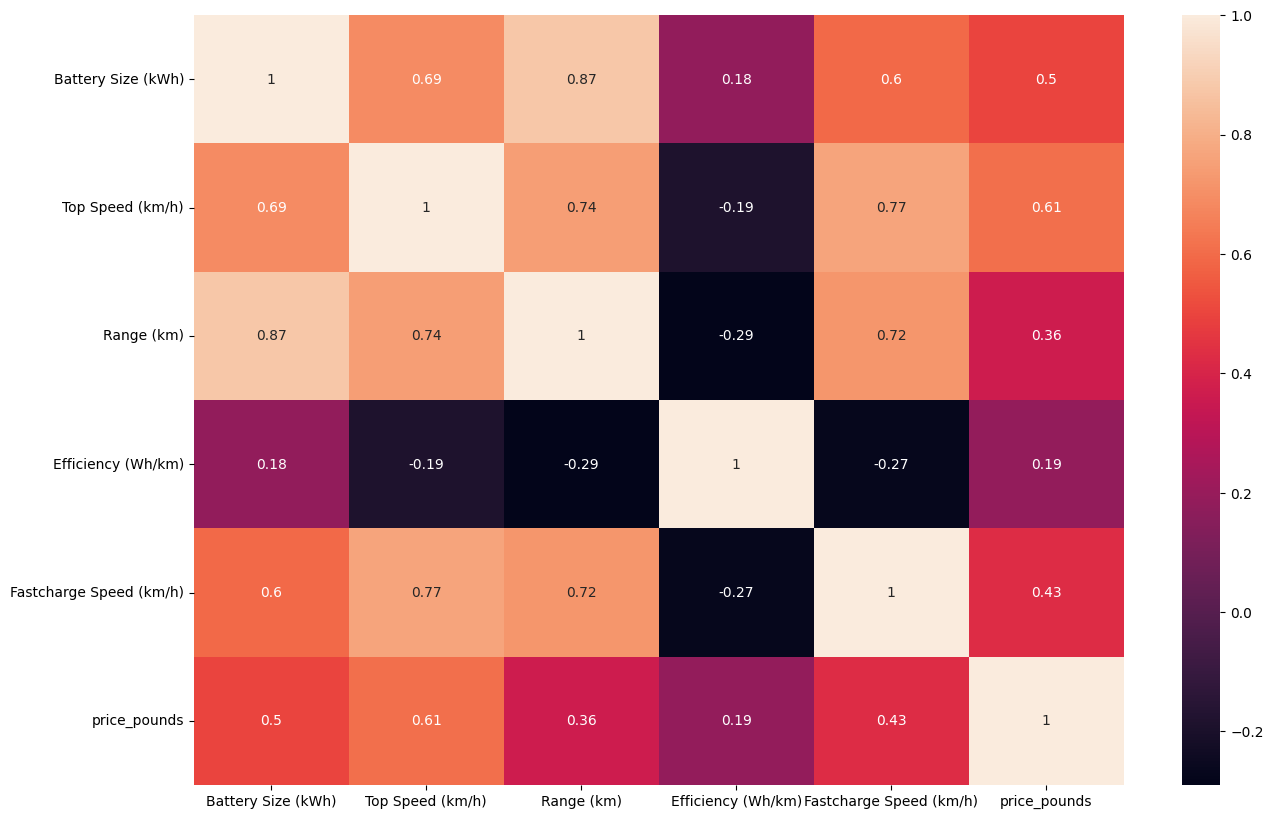

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:,1:].corr(), annot=True)
plt.show()

Inference: 
1. Range and Battery size are highly correlated.
2. Top speed and Range are also correlated.

### Scaling Dataframe

In [36]:
!pip install threadpoolctl==3.1.0

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralBiclustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture

In [26]:
df_strip = df.iloc[:,1:]

In [27]:
df_strip.head()

,Battery Size (kWh),Top Speed (km/h),Range (km),Efficiency (Wh/km),Fastcharge Speed (km/h),price_pounds
0,57.5,225,405,142,680,42990.0
1,75.0,217,435,172,670,52990.0
2,75.0,233,485,155,750,50990.0
3,60.5,160,330,183,370,37195.0
4,57.5,201,420,137,700,44000.0


In [28]:
df_strip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 366
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Battery Size (kWh)       364 non-null    float64
 1   Top Speed (km/h)         364 non-null    int64  
 2   Range (km)               364 non-null    int64  
 3   Efficiency (Wh/km)       364 non-null    int64  
 4   Fastcharge Speed (km/h)  364 non-null    int64  
 5   price_pounds             364 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 19.9 KB


In [29]:
std_scaler = StandardScaler()

In [30]:
df_scaled = std_scaler.fit_transform(df_strip)

In [31]:
df_scaled_pd = pd.DataFrame(df_scaled)

In [32]:
df_scaled_pd.head()

,0,1,2,3,4,5
0,-0.693923,1.209842,0.328150,-1.666525,0.564982,-0.507305
1,0.181625,0.989665,0.613567,-0.728170,0.522182,-0.165143
2,0.181625,1.430020,1.089261,-1.259904,0.864581,-0.233576
3,-0.543829,-0.579100,-0.385391,-0.384107,-0.761814,-0.705587
4,-0.693923,0.549310,0.470859,-1.822917,0.650582,-0.472747


In [33]:
df_scaled_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       364 non-null    float64
 1   1       364 non-null    float64
 2   2       364 non-null    float64
 3   3       364 non-null    float64
 4   4       364 non-null    float64
 5   5       364 non-null    float64
dtypes: float64(6)
memory usage: 17.2 KB


### Performing KMeans Clustering without PCA (for Segementation)

In [34]:
###finding k value using elbow mehtod
inrt = []
for i in range(2,10):
    kmean = KMeans(n_clusters = i)
    kmean.fit_transform(df_scaled_pd)
    inrt.append(kmean.inertia_)

c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default valu

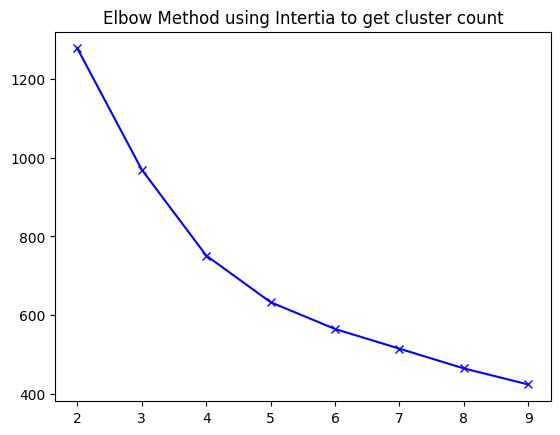

In [35]:
plt.plot(range(2,10), inrt, 'bx-')
plt.title('Elbow Method using Intertia to get cluster count')
plt.show()

Inference: Elbow shift is observable at k =4

c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default valu

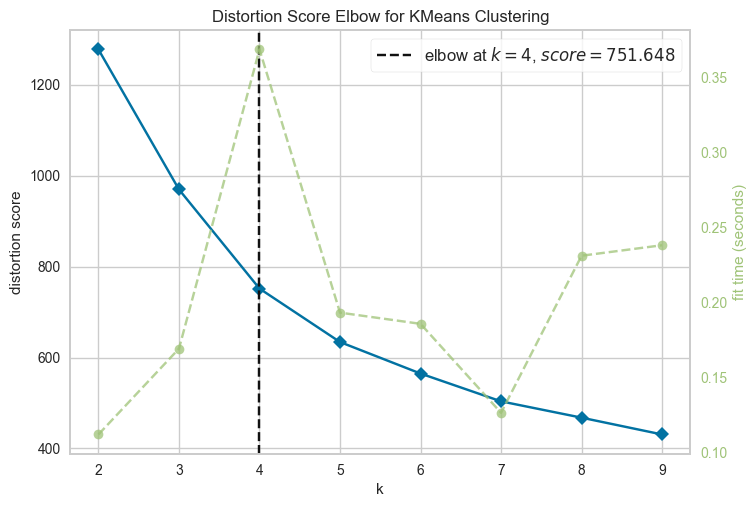

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k = (2,10)).fit(df_scaled_pd)
visualizer.show()

In [37]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

Taking 'k' = 4

In [38]:
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(df_scaled_pd)
df_scaled_pd['Cluster'] = kmeans_labels

c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Applying Agglomerative Hierarchical Clustering

In [39]:
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_clustering.fit_predict(df_scaled)

Applying DBSCAN

In [40]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

Coparing quality of clustering: 
The Silhouette Score ranges from -1 to 1, with higher values indicating better clustering quality.

In [41]:
# Silhouette Score
kmeans_score = silhouette_score(df_scaled, kmeans_labels)
agg_score = silhouette_score(df_scaled, agg_labels)
dbscan_score = silhouette_score(df_scaled, dbscan_labels)

# Compare clustering results
print(f"K-Means Silhouette Score: {kmeans_score}")
print(f"Agglomerative Silhouette Score: {agg_score}")
print(f"DBSCAN Silhouette Score: {dbscan_score}")

K-Means Silhouette Score: 0.3521312659281302
Agglomerative Silhouette Score: 0.33657729165787714
DBSCAN Silhouette Score: -0.06029627625487613


Inference: KMeans better clustering approach

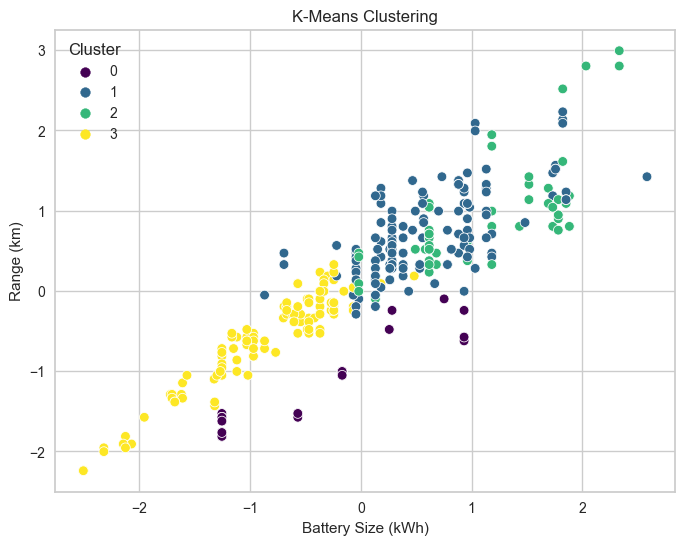

In [42]:
##choosing two features for scatter plot visualization

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled_pd[0], y=df_scaled_pd[2], hue='Cluster', data=df_scaled_pd, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Battery Size (kWh)')
plt.ylabel('Range (km)')
plt.show()


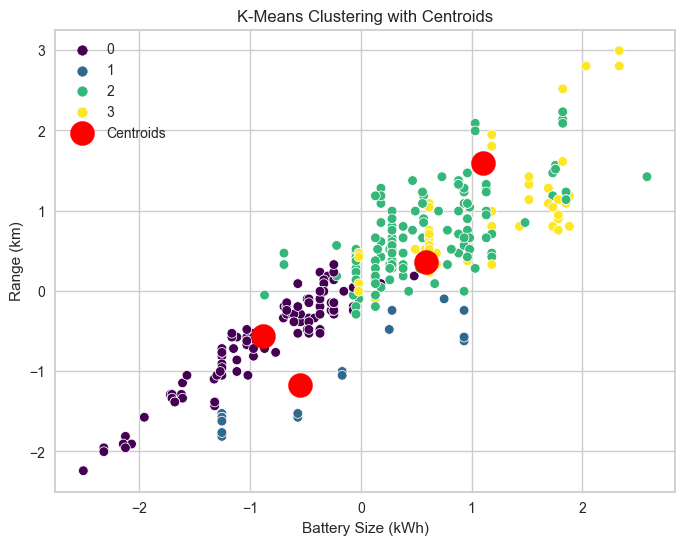

In [51]:
##plotting centroids

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled_pd[0], y=df_scaled_pd[2], hue='Cluster', data=df_scaled_pd, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Battery Size (kWh)')
plt.ylabel('Range (km)')
plt.legend()
plt.show()

In [52]:
df['Clusters'] = kmeans_labels

<Axes: xlabel='Clusters', ylabel='count'>

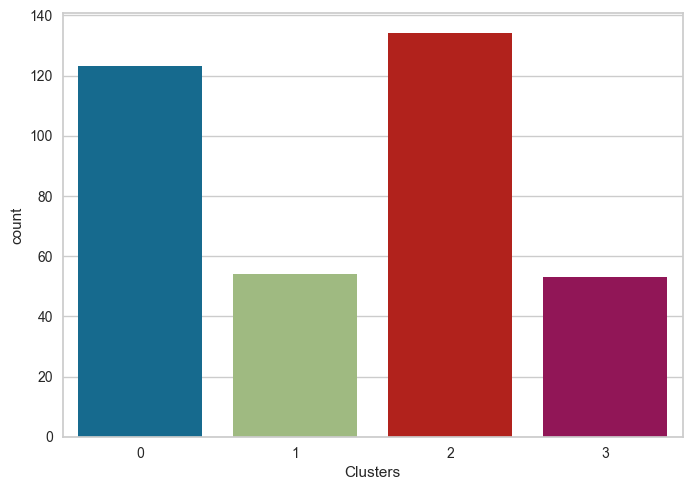

In [53]:
##cluster distribution

sns.countplot(x = 'Clusters', data = df)

In [54]:
df.head()

,Title,Battery Size (kWh),Top Speed (km/h),Range (km),Efficiency (Wh/km),Fastcharge Speed (km/h),price_pounds,Clusters
0,Tesla Model 3,57.5,225,405,142,680,42990.0,2
1,Tesla Model Y Long Range Dual Motor,75.0,217,435,172,670,52990.0,2
2,Tesla Model 3 Long Range Dual Motor,75.0,233,485,155,750,50990.0,2
3,BYD ATTO 3,60.5,160,330,183,370,37195.0,0
4,Tesla Model 3,57.5,201,420,137,700,44000.0,2


### Segement Analysis

In [55]:
for c in df.iloc[:,1:].drop(['Clusters'], axis = 1):
    grid = sns.FacetGrid(df, col = 'Clusters')
    grid = grid.map(plt.hist, c)
plt.show()

c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


### PCA for Dimensionality reduction

In [ ]:
##converting df to 2d for better visualization of the clusters
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data = principal_components, columns= ['PC1', 'PC2'])
pca_df

,PC1,PC2
0,0.637228,-1.988816
1,1.092544,-0.875789
2,1.706671,-1.513286
3,-1.268040,-0.509928
4,0.449323,-2.121525
...,...,...
359,-2.815520,1.591688
360,-2.815520,1.591688
361,-2.899662,1.490886
362,-2.855652,1.783272


In [ ]:
kmeans = KMeans(4)
kmeans.fit_predict(df_scaled)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame(({'Cluster': kmeans.labels_}))], axis=1)

c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
pca_df_kmeans['Cluster'].unique()

array([2, 3, 0, 1])

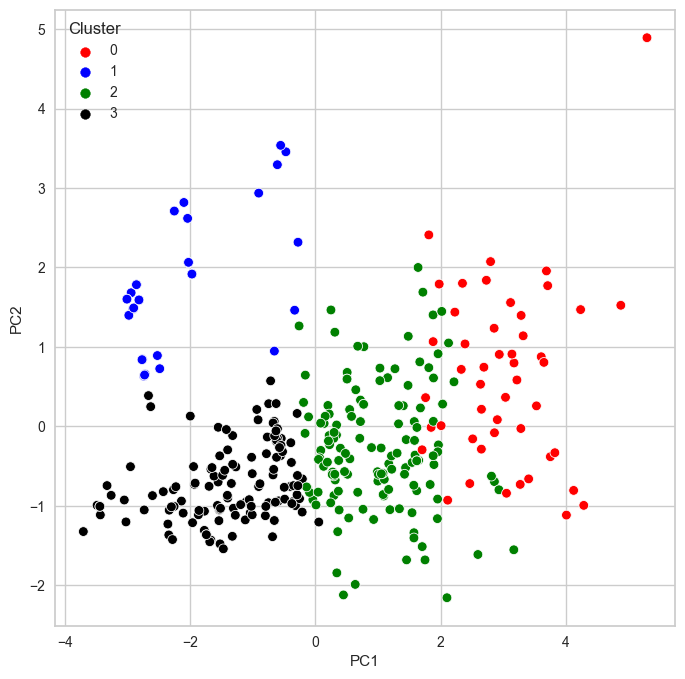

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Cluster', data = pca_df_kmeans, palette= ['red','blue', 'green', 'black'])
plt.show()

4 cluster visulization on pca data

In [ ]:
df.head()

,Title,Battery Size (kWh),Top Speed (km/h),Range (km),Efficiency (Wh/km),Fastcharge Speed (km/h),price_pounds,Clusters
0,Tesla Model 3,57.5,225,405,142,680,42990.0,1
1,Tesla Model Y Long Range Dual Motor,75.0,217,435,172,670,52990.0,1
2,Tesla Model 3 Long Range Dual Motor,75.0,233,485,155,750,50990.0,1
3,BYD ATTO 3,60.5,160,330,183,370,37195.0,2
4,Tesla Model 3,57.5,201,420,137,700,44000.0,1


In [ ]:
cluster_means = pd.DataFrame(df.groupby('Clusters')['price_pounds'].mean())

In [ ]:
cluster_means.rename(columns={'price_pounds': 'Averege_price (pounds)'}, inplace= True)

In [ ]:
cluster_means

,Averege_price (pounds)
Clusters,
0,49566.444444
1,53687.873134
2,42853.536585
3,111385.849057
